# Requirements

In [2]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import pandas as pd
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [8]:
data = pd.read_csv("amazon_stock_price.csv")

In [9]:
data.head(20)

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
5,1997-05-22,0.0719,0.0724,0.0656,0.0698,235536000
6,1997-05-23,0.0703,0.0760,0.0667,0.0750,318744000
7,1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000
8,1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000
9,1997-05-29,0.0771,0.0771,0.0740,0.0753,69456000


Explore the dataset using visualizations of your choice.

In [11]:
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [13]:
features = ['open', 'high', 'low', 'volume', 'close']
for feature in features:
    for lag in range(1, 8):
        data[f'{feature}_lag_{lag}'] = data[feature].shift(lag)

In [14]:
data.head(-10)

,date,open,high,low,close,volume,open_lag_1,open_lag_2,open_lag_3,open_lag_4,...,volume_lag_5,volume_lag_6,volume_lag_7,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000,0.1219,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0979,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000,0.0984,0.1219,NaN,NaN,...,NaN,NaN,NaN,0.0865,0.0979,NaN,NaN,NaN,NaN,NaN
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000,0.0880,0.0984,0.1219,NaN,...,NaN,NaN,NaN,0.0854,0.0865,0.0979,NaN,NaN,NaN,NaN
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000,0.0865,0.0880,0.0984,0.1219,...,NaN,NaN,NaN,0.0818,0.0854,0.0865,0.0979,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,2023-11-15,147.0600,147.2900,142.5900,143.2000,63875700,145.0000,142.0800,140.4600,142.0200,...,44521700.0,53553500.0,44970400.0,145.8000,142.5900,143.5600,140.6000,142.08,142.71,139.74
6671,2023-11-16,140.9100,143.3200,139.5200,142.8300,49653500,147.0600,145.0000,142.0800,140.4600,...,36235400.0,44521700.0,53553500.0,143.2000,145.8000,142.5900,143.5600,140.60,142.08,142.71
6672,2023-11-17,142.6600,145.2300,142.5400,145.1800,49636700,140.9100,147.0600,145.0000,142.0800,...,49287800.0,36235400.0,44521700.0,142.8300,143.2000,145.8000,142.5900,143.56,140.60,142.08
6673,2023-11-20,145.1300,146.6300,144.7300,146.1300,41951200,142.6600,140.9100,147.0600,145.0000,...,35680600.0,49287800.0,36235400.0,145.1800,142.8300,143.2000,145.8000,142.59,143.56,140.60


In [15]:
data = data.dropna(axis=0)


In [16]:
data

,date,open,high,low,close,volume,open_lag_1,open_lag_2,open_lag_3,open_lag_4,...,volume_lag_5,volume_lag_6,volume_lag_7,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
7,1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000,0.0703,0.0719,0.0818,0.0865,...,122136000.0,294000000.0,1.443120e+09,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865,0.0979
8,1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000,0.0755,0.0703,0.0719,0.0818,...,109344000.0,122136000.0,2.940000e+08,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865
9,1997-05-29,0.0771,0.0771,0.0740,0.0753,69456000,0.0812,0.0755,0.0703,0.0719,...,377064000.0,109344000.0,1.221360e+08,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854
10,1997-05-30,0.0750,0.0755,0.0740,0.0750,51888000,0.0771,0.0812,0.0755,0.0703,...,235536000.0,377064000.0,1.093440e+08,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818
11,1997-06-02,0.0755,0.0766,0.0750,0.0755,11832000,0.0750,0.0771,0.0812,0.0755,...,318744000.0,235536000.0,3.770640e+08,0.0750,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000,147.8500,146.9800,147.5300,146.7000,...,45669100.0,71226000.0,4.195120e+07,146.3200,147.0300,147.7300,146.7400,146.7100,143.9000,146.1300
6681,2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600,144.7600,147.8500,146.9800,147.5300,...,22378400.0,45669100.0,7.122600e+07,146.0900,146.3200,147.0300,147.7300,146.7400,146.7100,143.9000
6682,2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200,146.0000,144.7600,147.8500,146.9800,...,53762400.0,22378400.0,4.566910e+07,147.0300,146.0900,146.3200,147.0300,147.7300,146.7400,146.7100
6683,2023-12-05,143.5500,148.5700,143.1300,146.8800,46822400,145.2500,146.0000,144.7600,147.8500,...,42711700.0,53762400.0,2.237840e+07,144.8400,147.0300,146.0900,146.3200,147.0300,147.7300,146.7400


In [17]:
# data = data.iloc[:, 6:]

In [18]:
# data

In [19]:
lagged_features = [f'{feature}_lag_{lag}' for feature in features for lag in range(1, 8)]

In [20]:
X, Y = data[lagged_features], data['close']

In [21]:
X

,open_lag_1,open_lag_2,open_lag_3,open_lag_4,open_lag_5,open_lag_6,open_lag_7,high_lag_1,high_lag_2,high_lag_3,...,volume_lag_5,volume_lag_6,volume_lag_7,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
7,0.0703,0.0719,0.0818,0.0865,0.0880,0.0984,0.1219,0.0760,0.0724,0.0823,...,122136000.0,294000000.0,1.443120e+09,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865,0.0979
8,0.0755,0.0703,0.0719,0.0818,0.0865,0.0880,0.0984,0.0823,0.0760,0.0724,...,109344000.0,122136000.0,2.940000e+08,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865
9,0.0812,0.0755,0.0703,0.0719,0.0818,0.0865,0.0880,0.0818,0.0823,0.0760,...,377064000.0,109344000.0,1.221360e+08,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854
10,0.0771,0.0812,0.0755,0.0703,0.0719,0.0818,0.0865,0.0771,0.0818,0.0823,...,235536000.0,377064000.0,1.093440e+08,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818
11,0.0750,0.0771,0.0812,0.0755,0.0703,0.0719,0.0818,0.0755,0.0771,0.0818,...,318744000.0,235536000.0,3.770640e+08,0.0750,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,147.8500,146.9800,147.5300,146.7000,144.5700,143.9100,145.1300,148.5400,147.6000,149.2600,...,45669100.0,71226000.0,4.195120e+07,146.3200,147.0300,147.7300,146.7400,146.7100,143.9000,146.1300
6681,144.7600,147.8500,146.9800,147.5300,146.7000,144.5700,143.9100,146.9300,148.5400,147.6000,...,22378400.0,45669100.0,7.122600e+07,146.0900,146.3200,147.0300,147.7300,146.7400,146.7100,143.9000
6682,146.0000,144.7600,147.8500,146.9800,147.5300,146.7000,144.5700,147.2500,146.9300,148.5400,...,53762400.0,22378400.0,4.566910e+07,147.0300,146.0900,146.3200,147.0300,147.7300,146.7400,146.7100
6683,145.2500,146.0000,144.7600,147.8500,146.9800,147.5300,146.7000,145.3500,147.2500,146.9300,...,42711700.0,53762400.0,2.237840e+07,144.8400,147.0300,146.0900,146.3200,147.0300,147.7300,146.7400


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [25]:
X_train.shape


(5342, 35)

In [26]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


In [27]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [31]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [33]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [35]:
# Write your code here. Add as many boxes as you need.

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [38]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [72]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [74]:

params = {
    "n_estimators": np.arange(50, 500, 100),
    "max_depth": [3, 5, 7]
}

In [76]:
grid_search = GridSearchCV(XGBRegressor(), cv=TimeSeriesSplit(5), param_grid=params)


In [78]:
grid_search.fit(X, Y, verbose=2)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': array([ 50, 150, 250, 350, 450])})

In [79]:
estimator = grid_search.best_estimator_


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [90]:
estimator.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
preds = estimator.predict(X_test)

In [94]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(1955.9518510269165, 33.10383326963322, -123.04885940032956)

Use the trained model to make predictions for the test set.

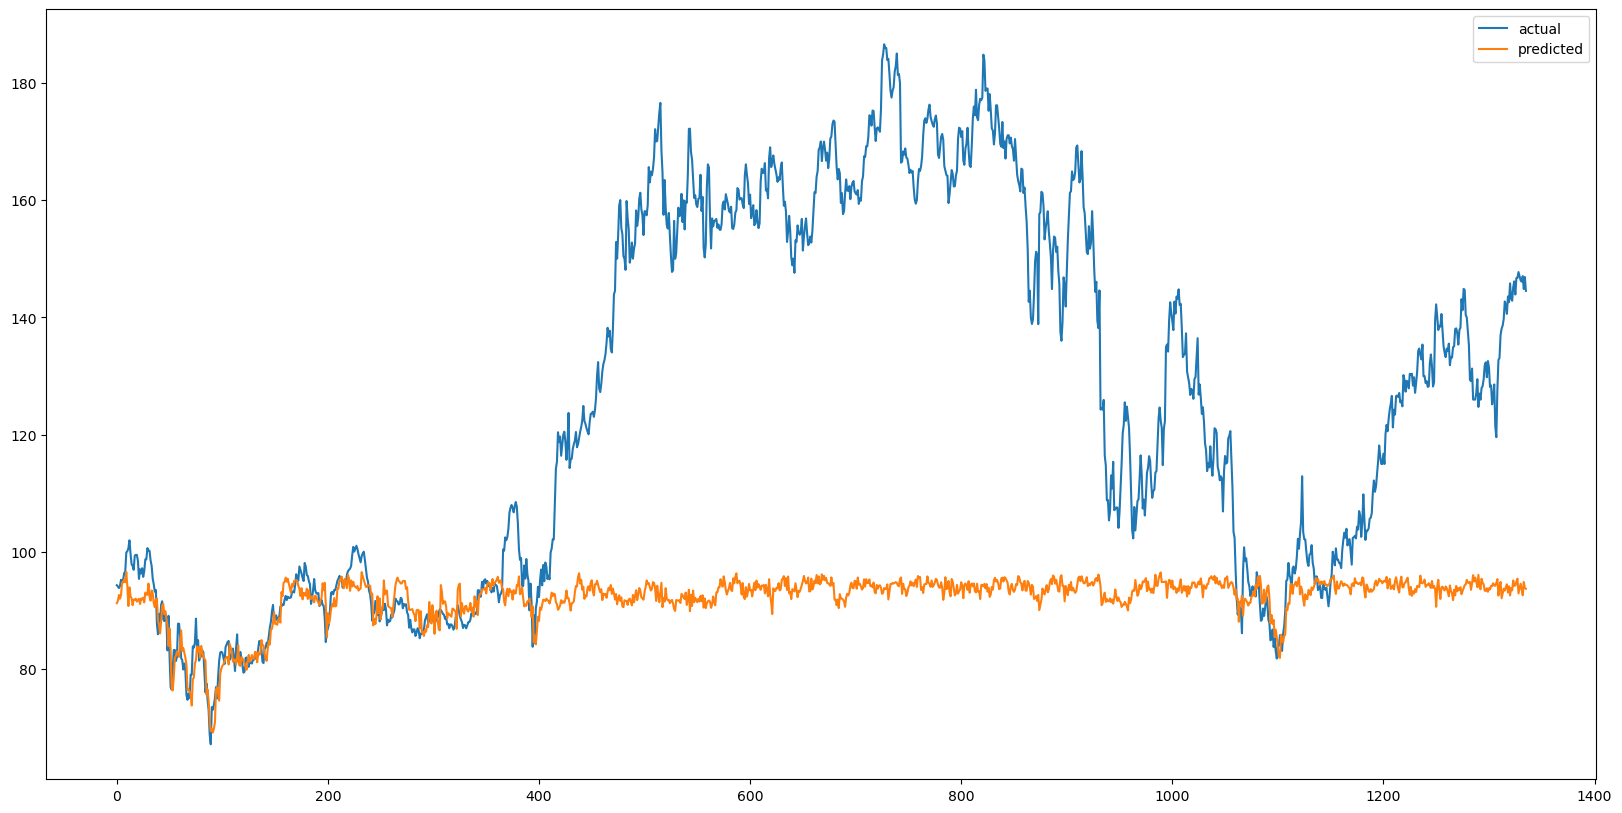

In [96]:

plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()

In [42]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [44]:
# Write your code here. Add as many boxes as you need.